In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('house.csv',usecols=['FireplaceQu','GarageQual','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [3]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

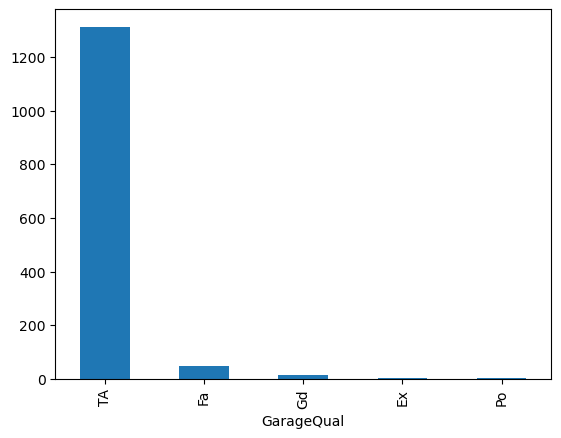

In [4]:
df['GarageQual'].value_counts().plot(kind='bar')

In [5]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

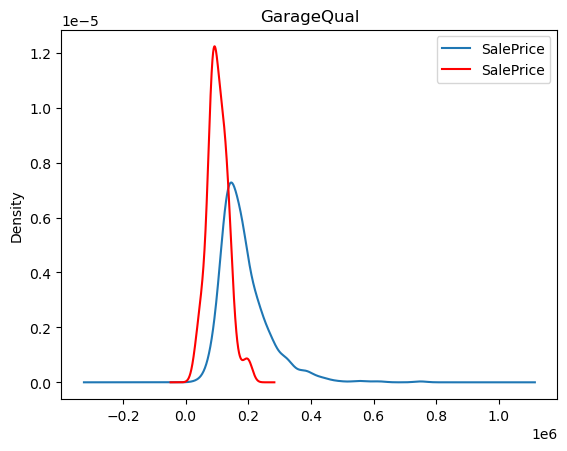

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels = ax.get_legend_handles_labels()
lables = ['Houses with TA', 'Houses with NA']
ax.legend(lines,labels,loc='best')

plt.title('GarageQual')

In [10]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [12]:
df.fillna({'GarageQual':'TA'},inplace=True)                     #filling missing value with TA(mode)

<Axes: xlabel='GarageQual'>

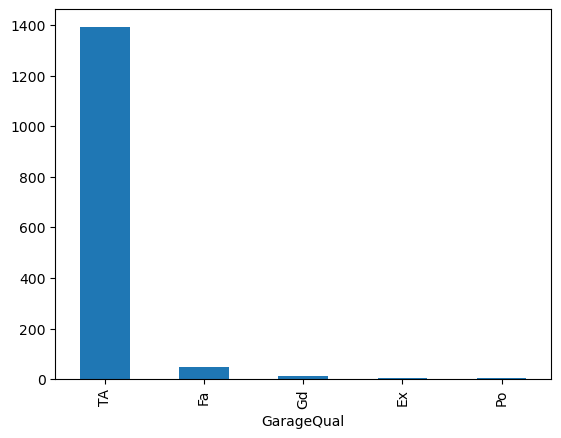

In [13]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

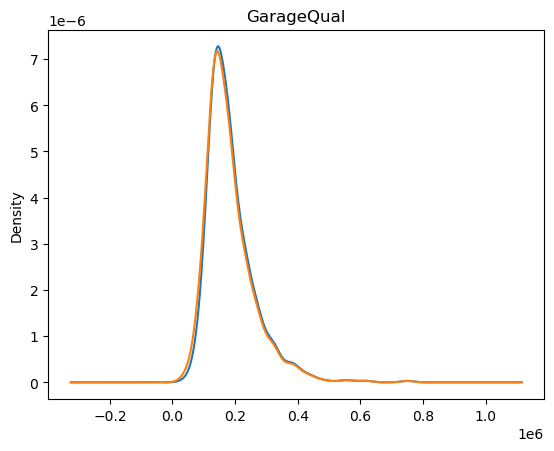

In [18]:
#comparing 
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde',ax=ax)          

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)

plt.title('GarageQual')



<Axes: xlabel='FireplaceQu'>

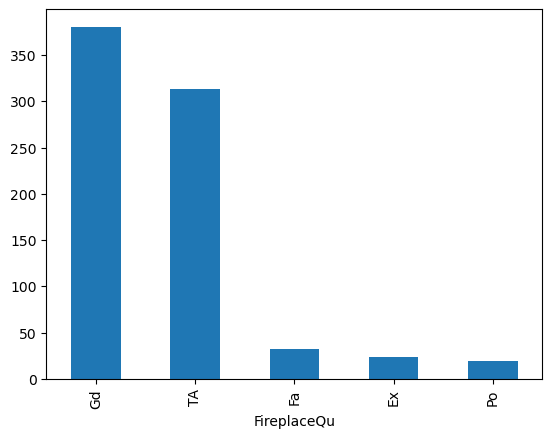

In [19]:
#now for fireplacequ column
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

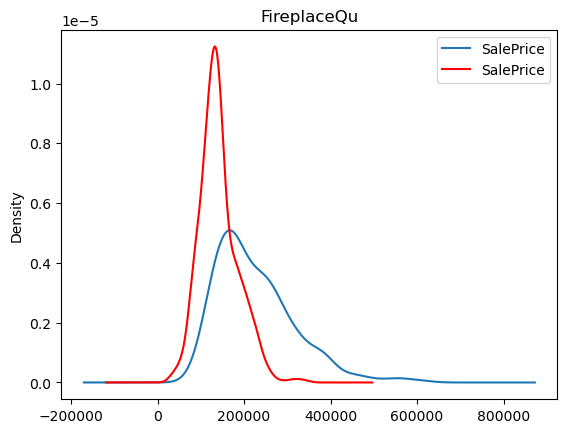

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels = ax.get_legend_handles_labels()
lables = ['Houses with GD', 'Houses with NA']
ax.legend(lines,labels,loc='best')

plt.title('FireplaceQu')

<Axes: xlabel='FireplaceQu'>

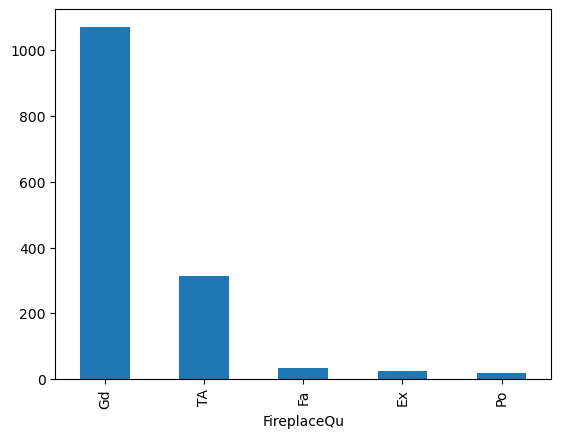

In [22]:
#imputation using pandas with mode
temp = df[df['FireplaceQu']=='TA']['SalePrice']
df.fillna({'FireplaceQu':'Gd'},inplace=True)
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

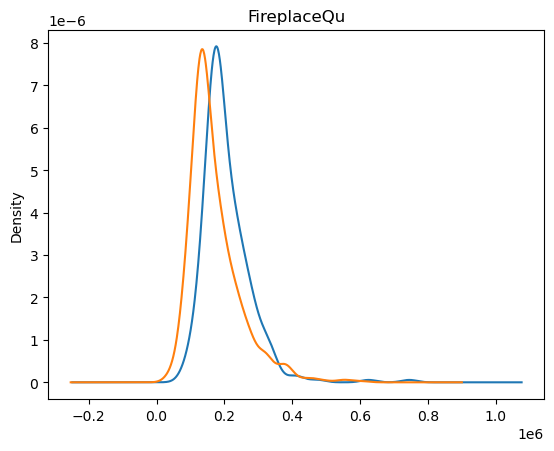

In [23]:
#comparing 
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde',ax=ax)          

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax)

plt.title('FireplaceQu')

In [24]:
#Using SKLearn for imputation
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [25]:
from sklearn.impute import SimpleImputer

In [26]:
imputer = SimpleImputer(strategy='most_frequent')

In [27]:
xtrain = imputer.fit_transform(xtrain)
xtest = imputer.transform(xtrain)

D:\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [28]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)